<a href="https://colab.research.google.com/github/alendoko/bina/blob/main/LB4/DATA/Python_JUPYTER_Data_Analysis_SteyByStep_Melbourne_Houseprice2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook with **Exploratory Data Analysis** (EDA) - Step by Step - with the Melbourne House Market Data


# Introduction


**Exploratory Data Analysis** (EDA) is a critical step in any data science project. It involves understanding the data, identifying patterns, and making initial observations. This notebook will guide you through the process of EDA using Python's **Pandas** library, a powerful tool for data manipulation and analysis.

See
+ [Analytics Vidhya Blog](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/) of [Malamahadevan Mahadevan](https://www.analyticsvidhya.com/blog/author/malamahadevan/), or
+ [Exploratory Data Analysis with Python Pandas: A Complete Guide](https://docs.kanaries.net/articles/exploratory-data-analysis-python-pandas) of Omar Williams

for a detailed description of the Exploratory Data Analysis (EDA) with Python Pandas

---  
According to the [dataset description](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) on Kaggle, the housing prices in Melbourne reached a peak in 2017. As [this article on *theguardian.com*](https://www.theguardian.com/australia-news/2019/jan/02/australian-house-prices-falling-at-fastest-rate-in-a-decade-data-shows) describes, the prices are dropping rapidly in 2019.
​   
The data was scraped from publicly available results posted every week from Domain.com.au and cleaned it. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

See
+ [Dans Becker@Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) for more Details on the Melbourne Housing Price dataset.

<br>   

---  

## The Melbourne House Data
On the website of Kaggle, we can download one [data set](https://www.kaggle.com/anthonypino/melbourne-housing-market) containing the attributes and a target variable. The data is provided under a Attribution-NonCommercial-ShareAlike 4.0 International [(CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).

The variables in this **Melbourne House Data** set on Kaggle are:
* Suburb
* Address
* Rooms: Number of rooms
* Price: Price in Australian dollars, target variable
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Latitude
* Longtitude

> Note: There are a number of variables that contain information that could be linked to a person, like the address and the name of the estate agent. For privacy reasons, we will not use these variables. Additionally, we will remove all geographical data, except the longitude and latitude.  


---   
# Step 1 - Loading and Importing Libraries

In [1]:
#Load necessary packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---   
# Step 2 - Loading the Dataset (Melbourne Housing Data)

In [2]:
# Reading the dataset from the github repository
dataFILE = 'https://raw.githubusercontent.com/alendoko/bina/refs/heads/main/LB4/DATA/Melbourne_house_price_FULL.csv'
parse_dates = ['Date']
dataMBHraw = pd.read_csv(dataFILE, encoding='utf-8', parse_dates=parse_dates)

In [6]:
dataMBHraw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataMBHraw['Date'] = pd.to_datetime(dataMBHraw['Date'], errors='coerce')

---   
# Step 3 - Analyzing the Data

## Initial Data Examination  

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

+ **shape** will display the number of observations(rows) and features(columns) in the dataset

In [7]:
dataMBHraw.shape

(34857, 21)

+ **head()** will display the top 5 observations of the dataset

In [9]:
dataMBHraw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


+ **tail()** will display the last 5 observations of the dataset

In [10]:
dataMBHraw.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,NaT,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,NaT,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,NaT,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,NaT,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,NaT,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


+ **info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [11]:
dataMBHraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           13385 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [12]:
# Understanding variables in Suburb column
print(dataMBHraw['Suburb'].value_counts())
# >>> There are about 351 different suburbs

Suburb
Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: count, Length: 351, dtype: int64


In [13]:
# Understanding variables in Type column
print(dataMBHraw['Type'].value_counts())
# >>> Most of the houses sold are house,cottage villa or semi terrace type

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64


In [14]:
# Understanding variables in Method column
print(dataMBHraw['Method'].value_counts())
# >>> About half of the entries are sold by the property (S)

Method
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64


In [15]:
print(dataMBHraw['CouncilArea'].value_counts())

CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

In [16]:
print(dataMBHraw['Regionname'].value_counts())
# >>> Most of the houses sold are from Southern Metropolitan region

Regionname
Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64


## Check for Duplication  

+ **nunique()** based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [17]:
dataMBHraw.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                32
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

## Missing Values Calculation   

+ **isnull()** is widely been in all pre-processing steps to identify null values in the data

In [18]:
dataMBHraw.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
34853,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
34854,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
34855,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,False,True,True,False,False


In [19]:
# isnull().sum() is used to get the number of missing records in each column
dataMBHraw.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date             21472
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

---   
# Step 4 - Data Reduction   

Some columns or variables can be dropped if they do not add value to our analysis.

In [20]:
# e.g. Remove "SellerG" and "Bedroom2" column from the dataset
dataMBH = dataMBHraw.drop(['SellerG','Bedroom2'], axis = 1)
dataMBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   Date           13385 non-null  datetime64[ns]
 7   Distance       34856 non-null  float64       
 8   Postcode       34856 non-null  float64       
 9   Bathroom       26631 non-null  float64       
 10  Car            26129 non-null  float64       
 11  Landsize       23047 non-null  float64       
 12  BuildingArea   13742 non-null  float64       
 13  YearBuilt      15551 non-null  float64       
 14  CouncilArea    34854 non-null  object        
 15  Lattitude      2688

---   
# Step 5 - Feature Engineering   

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [22]:
dataMBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   Date           13385 non-null  datetime64[ns]
 7   Distance       34856 non-null  float64       
 8   Postcode       34856 non-null  float64       
 9   Bathroom       26631 non-null  float64       
 10  Car            26129 non-null  float64       
 11  Landsize       23047 non-null  float64       
 12  BuildingArea   13742 non-null  float64       
 13  YearBuilt      15551 non-null  float64       
 14  CouncilArea    34854 non-null  object        
 15  Lattitude      2688

## Convert Datatypes   

Convert the Pandas column in a dataframe to a specific or more appropriate datatype (e.g. ``int``, ``float``, ``string``)

> Note: Check for "NaN" values first and convert "missing values" to specific values (e.g. 0 for int values)

In [23]:
# convert single column to 'int' dtype and replace NaN values (e.g. 0) with the 'fillna( )' function
dataMBH['YearBuilt'] = dataMBH['YearBuilt'].fillna(0).astype('int')

In [24]:
# convert multiple columns
dataMBH = dataMBH.fillna(0).astype({"Postcode":"int","Bathroom":"int", "Distance":"int", "Car":"int", "Landsize":"int", "BuildingArea":"int"})

In [25]:
# fillna converts Date into object.... therefore
dataMBH["Date"] = pd.to_datetime(dataMBH["Date"])

In [26]:
dataMBH.head()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.0,SS,2016-03-09,2,3067,1,1,126,0,0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,2016-03-12,2,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,2016-04-02,2,3067,2,1,0,0,0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [27]:
dataMBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          34857 non-null  float64       
 5   Method         34857 non-null  object        
 6   Date           34857 non-null  datetime64[ns]
 7   Distance       34857 non-null  int64         
 8   Postcode       34857 non-null  int64         
 9   Bathroom       34857 non-null  int64         
 10  Car            34857 non-null  int64         
 11  Landsize       34857 non-null  int64         
 12  BuildingArea   34857 non-null  int64         
 13  YearBuilt      34857 non-null  int64         
 14  CouncilArea    34857 non-null  object        
 15  Lattitude      3485

## Create Features

We will play around with the variables `Date` and `YearBuilt` in our dataset.

+ If we see the sample data, the column “YearBuilt” shows the year the house was built. It would be difficult to find the house’s age. Introducing a new column, “zHouse_Age” to know the age of the house  


In [28]:
from datetime import date
actual_year = date.today().year
dataMBH['zHouse_Age']=actual_year - dataMBH['YearBuilt']
dataMBH.head()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zHouse_Age
0,Abbotsford,68 Studley St,2,h,0.0,SS,2016-03-09,2,3067,1,1,126,0,0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2025
1,Abbotsford,85 Turner St,2,h,1480000.0,S,2016-03-12,2,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2025
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,125
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,2016-04-02,2,3067,2,1,0,0,0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2025
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,125


+ The column "Date" is in the `datetime64`format. To analyze frequency or distribution of entries along months, weeks or day of weeks we need additional columns (variables)

In [29]:
dataMBH['zDate_Year']=dataMBH['Date'].dt.year
dataMBH['zDate_Month']=dataMBH['Date'].dt.month
dataMBH['zDate_DoW']=dataMBH['Date'].dt.day_of_week
dataMBH.head()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zHouse_Age,zDate_Year,zDate_Month,zDate_DoW
0,Abbotsford,68 Studley St,2,h,0.0,SS,2016-03-09,2,3067,1,...,0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2025,2016,3,2
1,Abbotsford,85 Turner St,2,h,1480000.0,S,2016-03-12,2,3067,1,...,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2025,2016,3,5
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2,3067,1,...,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,125,2016,4,5
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,2016-04-02,2,3067,2,...,0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2025,2016,4,5
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2,3067,2,...,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,125,2017,4,0


+ To compare multiple entries by their price we may need an indicator like "Price per Room" in the dataset.

In [30]:
dataMBH['zPrice_perRoom']=dataMBH['Price'] / dataMBH['Rooms']
dataMBH.head()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zHouse_Age,zDate_Year,zDate_Month,zDate_DoW,zPrice_perRoom
0,Abbotsford,68 Studley St,2,h,0.0,SS,2016-03-09,2,3067,1,...,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2025,2016,3,2,0.000000
1,Abbotsford,85 Turner St,2,h,1480000.0,S,2016-03-12,2,3067,1,...,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2025,2016,3,5,740000.000000
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2,3067,1,...,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,125,2016,4,5,517500.000000
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,2016-04-02,2,3067,2,...,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2025,2016,4,5,0.000000
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2,3067,2,...,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,125,2017,4,0,488333.333333


+ Since the ``Address`` column contains Stree Name as well as Street No we cannot easily group or filter entries with identical Street locations. But we can process this column to extract important information using Street Name and Number. Let’s ``split`` the Address and introduce new variables “zStreet" and “zStreetNo”

In [31]:
dataMBH['zStreet']   = dataMBH.Address.str.split().str.get(1)
dataMBH['zStreetNo'] = dataMBH.Address.str.split().str.get(0)
dataMBH[['Address', 'zStreet','zStreetNo', 'Suburb']]

,Address,zStreet,zStreetNo,Suburb
0,68 Studley St,Studley,68,Abbotsford
1,85 Turner St,Turner,85,Abbotsford
2,25 Bloomburg St,Bloomburg,25,Abbotsford
3,18/659 Victoria St,Victoria,18/659,Abbotsford
4,5 Charles St,Charles,5,Abbotsford
...,...,...,...,...
34852,13 Burns St,Burns,13,Yarraville
34853,29A Murray St,Murray,29A,Yarraville
34854,147A Severn St,Severn,147A,Yarraville
34855,12/37 Stephen St,Stephen,12/37,Yarraville


+ **One hot encoding** consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category/label of the variable was present for that observation.
Each one of the boolean variables are also known as **dummy variables** or binary variables

This method to transform the strings of categorical variables into numbers is widely used to feed these categorical variables into **machine learning algorithms**

In [38]:
# convert object (categorical) columns to dummies
dataMBH_dummies = pd.get_dummies(dataMBH[['Type','Method']])

In [39]:
dataMBH_dummies.columns

Index(['Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_PN', 'Method_S',
       'Method_SA', 'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB',
       'Method_W'],
      dtype='object')

In [40]:
dataMBH_dummies.head(10)

,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,True,False,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,True,False,False,False
5,True,False,False,True,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,True,False
7,True,False,False,False,False,False,False,True,False,False,False,False
8,True,False,False,False,False,True,False,False,False,False,False,False
9,True,False,False,False,False,True,False,False,False,False,False,False


## Data Cleaning/Wrangling   

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors (e.g. "NaN" values), and some variables may need data type conversion (e.g. from ``float`` to ``int`` or from ``string`` to ``int``). We need to fix these issues in the data.

In [42]:
print(dataMBH.Regionname.unique())
print(dataMBH.Regionname.nunique())

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria' 0]
9


In [43]:
zSuburb =dataMBH.Suburb.unique()
print(np.sort(zSuburb))

['Abbotsford' 'Aberfeldie' 'Airport West' 'Albanvale' 'Albert Park'
 'Albion' 'Alphington' 'Altona' 'Altona Meadows' 'Altona North' 'Ardeer'
 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood' 'Aspendale'
 'Aspendale Gardens' 'Attwood' 'Avondale Heights' 'Avonsleigh'
 'Bacchus Marsh' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bayswater'
 'Bayswater North' 'Beaconsfield' 'Beaconsfield Upper' 'Beaumaris'
 'Belgrave' 'Bellfield' 'Bentleigh' 'Bentleigh East' 'Berwick'
 'Black Rock' 'Blackburn' 'Blackburn North' 'Blackburn South' 'Bonbeach'
 'Boronia' 'Botanic Ridge' 'Box Hill' 'Braybrook' 'Briar Hill' 'Brighton'
 'Brighton East' 'Broadmeadows' 'Brookfield' 'Brooklyn' 'Brunswick'
 'Brunswick East' 'Brunswick West' 'Bulla' 'Bulleen' 'Bullengarook'
 'Bundoora' 'Burnley' 'Burnside' 'Burnside Heights' 'Burwood'
 'Burwood East' 'Cairnlea' 'Camberwell' 'Campbellfield' 'Canterbury'
 'Carlton' 'Carlton North' 'Carnegie' 'Caroline Springs' 'Carrum'
 'Carrum Downs' 'Caulfield' 'Caulfield East' 'Caulfield North'

+ In the example, The suburb name ‘croydon’ and ‘viewbank’ looks incorrect. This needs to be corrected

In [44]:
dataMBH["Suburb"].replace({"croydon": "Croydon", "viewbank": "Viewbank"}, inplace=True)
dataMBH.head()

C:\Users\Donat\AppData\Local\Temp\ipykernel_23692\3804270147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataMBH["Suburb"].replace({"croydon": "Croydon", "viewbank": "Viewbank"}, inplace=True)


,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,...,Longtitude,Regionname,Propertycount,zHouse_Age,zDate_Year,zDate_Month,zDate_DoW,zPrice_perRoom,zStreet,zStreetNo
0,Abbotsford,68 Studley St,2,h,0.0,SS,2016-03-09,2,3067,1,...,144.9958,Northern Metropolitan,4019.0,2025,2016,3,2,0.000000,Studley,68
1,Abbotsford,85 Turner St,2,h,1480000.0,S,2016-03-12,2,3067,1,...,144.9984,Northern Metropolitan,4019.0,2025,2016,3,5,740000.000000,Turner,85
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2,3067,1,...,144.9934,Northern Metropolitan,4019.0,125,2016,4,5,517500.000000,Bloomburg,25
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,2016-04-02,2,3067,2,...,145.0116,Northern Metropolitan,4019.0,2025,2016,4,5,0.000000,Victoria,18/659
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2,3067,2,...,144.9944,Northern Metropolitan,4019.0,125,2017,4,0,488333.333333,Charles,5


## Impute Missing Values   

Missing data arise in almost all statistical analyses. There are many ways to impute missing values. We can impute missing values using their mean, median, most frequent value, or zero, and we can also use advanced imputation algorithms such as KNN, regularization, etc.

However, we cannot rely solely on a simple mean or median for imputation. Business knowledge or common insights about the data are essential. If we have domain knowledge, it can significantly enhance the imputation process. Some missing data can be imputed based on reasonable assumptions.

In [45]:
# Total Missing value for each feature
print(dataMBHraw.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date             21472
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [46]:
dataMBHraw.Price.isnull().sum()

np.int64(7610)

In [47]:
# fills NaN with mean
dataMBHraw['Price'] = dataMBHraw['Price'].fillna(value=np.mean(dataMBH['Price']))
dataMBHraw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,8.208989e+05,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,8.208989e+05,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Lets replace Missing Values of YearBuilt with the Mean per Group

In [48]:
dataMBHraw.YearBuilt.isnull().sum()
# Grouping by Suburb and Replacing Missing Values with the Mean per Group
dataMBHraw['YearBuilt'] = dataMBHraw.groupby(['Suburb'])['YearBuilt'].transform(lambda x: x.fillna(x.mean()))

In [49]:
dataMBHraw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,8.208989e+05,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,1942.545455,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,1942.545455,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,8.208989e+05,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,1942.545455,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


> Note: In general, **there are no defined or perfect rules** for imputing missing values in a dataset. Each method can perform better for some datasets but may perform even worse. Only practice and experiments give the knowledge which works better.

---   
# Step 6 - Exploratory Data Analysis (EDA)

We have done the fundamental data analysis, featuring, and data clean-up. Voila! Our Data is ready to perform exploratory data analysis.

Let’s move to the EDA process :-)


## Statistics Summary   

The information gives a quick and simple description of the data. Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using ``describe()``

+ **describe()** – Provide a statistics summary of data belonging to *numerical* datatype such as int, float

In [50]:
dataMBH.describe()

,Rooms,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zHouse_Age,zDate_Year,zDate_Month,zDate_DoW,zPrice_perRoom
count,34857.000000,3.485700e+04,34857,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,3.485700e+04
mean,3.031012,8.208989e+05,1988-03-11 01:40:08.365608064,10.745302,3115.973463,1.241358,1.295952,392.480018,63.176493,876.788679,-29.158782,111.822439,7572.236538,1148.211321,1987.996586,3.256706,2.906791,2.786659e+05
min,1.000000,0.000000e+00,1970-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,0.000000,0.000000,-81.000000,1970.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,4.000000e+05,1970-01-01 00:00:00,6.000000,3051.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-37.846900,144.726290,4385.000000,60.000000,1970.000000,1.000000,3.000000,1.550000e+05
50%,3.000000,7.300000e+05,1970-01-01 00:00:00,10.000000,3103.000000,1.000000,1.000000,218.000000,0.000000,0.000000,-37.776590,144.974100,6763.000000,2025.000000,1970.000000,1.000000,3.000000,2.722000e+05
75%,4.000000,1.150000e+06,2017-03-06 00:00:00,14.000000,3156.000000,2.000000,2.000000,598.000000,117.000000,1965.000000,-37.634990,145.051750,10412.000000,2025.000000,2017.000000,6.000000,3.000000,3.937500e+05
max,16.000000,1.120000e+07,2018-10-03 00:00:00,48.000000,3978.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,0.000000,145.526350,21650.000000,2025.000000,2018.000000,12.000000,6.000000,3.050000e+06
std,0.969933,7.140444e+05,NaN,6.792856,110.292487,0.936326,1.151893,2777.938559,263.834546,977.258685,15.883671,60.912399,4428.457031,977.258685,22.797969,3.485210,1.274633,2.157229e+05


In [51]:
# as a transposed table for a better overview
dataMBH.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,34857.0,3.031012,1.0,2.0,3.0,4.0,16.0,0.969933
Price,34857.0,820898.904955,0.0,400000.0,730000.0,1150000.0,11200000.0,714044.448193
Date,34857,1988-03-11 01:40:08.365608064,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2017-03-06 00:00:00,2018-10-03 00:00:00,NaN
Distance,34857.0,10.745302,0.0,6.0,10.0,14.0,48.0,6.792856
Postcode,34857.0,3115.973463,0.0,3051.0,3103.0,3156.0,3978.0,110.292487
Bathroom,34857.0,1.241358,0.0,1.0,1.0,2.0,12.0,0.936326
Car,34857.0,1.295952,0.0,0.0,1.0,2.0,26.0,1.151893
Landsize,34857.0,392.480018,0.0,0.0,218.0,598.0,433014.0,2777.938559
BuildingArea,34857.0,63.176493,0.0,0.0,0.0,117.0,44515.0,263.834546
YearBuilt,34857.0,876.788679,0.0,0.0,0.0,1965.0,2106.0,977.258685


In [52]:
# describe(include=’all’) provides a statistics summary of all data, include object, category etc
dataMBH.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Suburb,34857,349,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857.0,NaN,NaN,NaN,3.031012,1.0,2.0,3.0,4.0,16.0,0.969933
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,34857.0,NaN,NaN,NaN,820898.904955,0.0,400000.0,730000.0,1150000.0,11200000.0,714044.448193
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,NaN,NaN,NaN,1988-03-11 01:40:08.365608064,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2017-03-06 00:00:00,2018-10-03 00:00:00,NaN
Distance,34857.0,NaN,NaN,NaN,10.745302,0.0,6.0,10.0,14.0,48.0,6.792856
Postcode,34857.0,NaN,NaN,NaN,3115.973463,0.0,3051.0,3103.0,3156.0,3978.0,110.292487
Bathroom,34857.0,NaN,NaN,NaN,1.241358,0.0,1.0,1.0,2.0,12.0,0.936326


> Before we do EDA, lets separate **Numerical** and **Categorical** variables for easy analysis

In [53]:
cat_cols=dataMBH.select_dtypes(include=['object']).columns
num_cols = dataMBH.select_dtypes(include=np.number).columns

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Suburb', 'Address', 'Type', 'Method', 'CouncilArea', 'Regionname',
       'zStreet', 'zStreetNo'],
      dtype='object')
Numerical Variables:
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'zHouse_Age', 'zDate_Year', 'zDate_Month', 'zDate_DoW',
       'zPrice_perRoom'],
      dtype='object')


## Univariate Analysis   

Analyzing/visualizing the dataset by **taking one variable at a time**.

+ Data visualization is essential; we must decide what charts to plot to better understand the data. We visualize our data using ``Matplotlib`` and ``Seaborn`` libraries.

Univariate (one variable at a time) analysis can be done for both Categorical and Numerical variables.

+ Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

+ Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.


In our example, we have done a Univariate Analysis using Histogram and  Box Plot for continuous Variables.
> In the below figure, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Column:  Rooms
Skew : 0.5


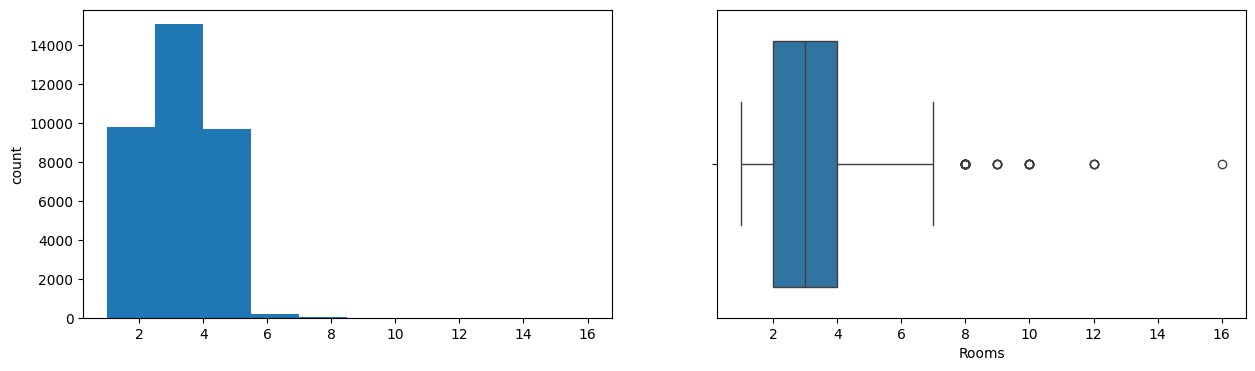

Column:  Price
Skew : 1.77


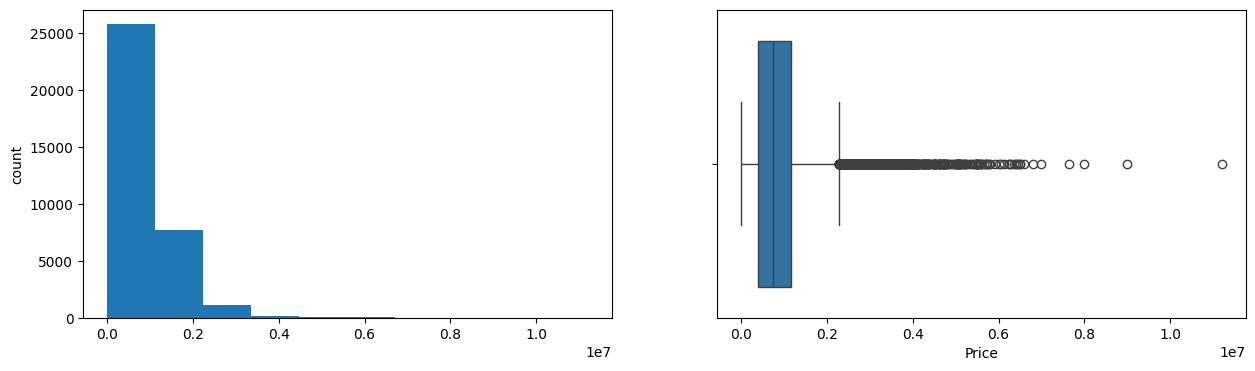

Column:  Distance
Skew : 1.51


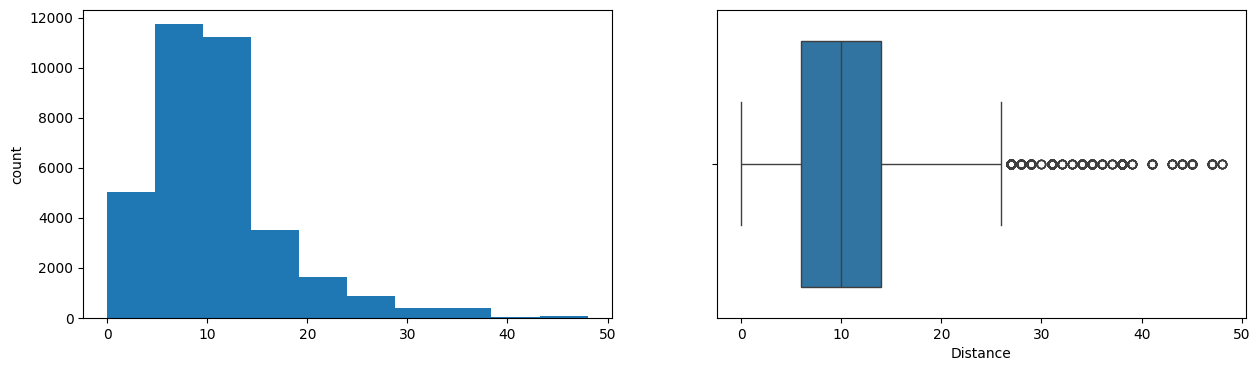

Column:  Postcode
Skew : 3.24


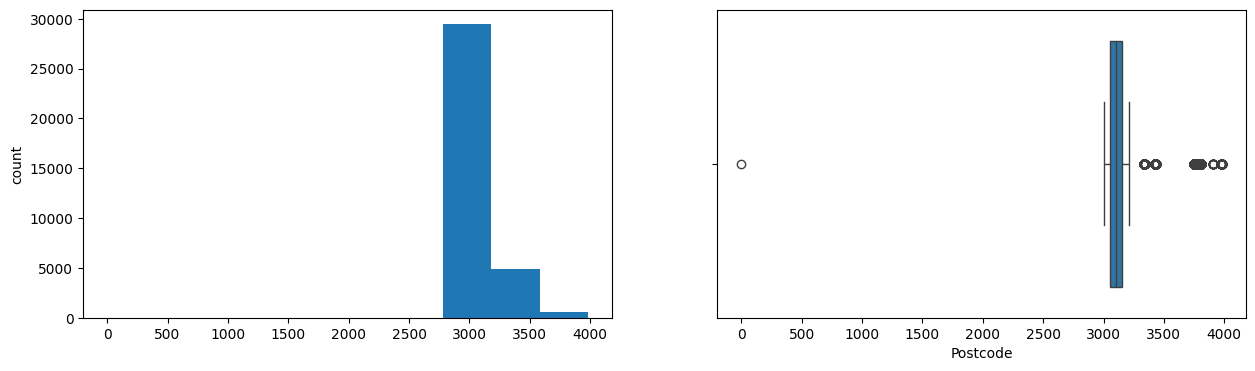

Column:  Bathroom
Skew : 0.54


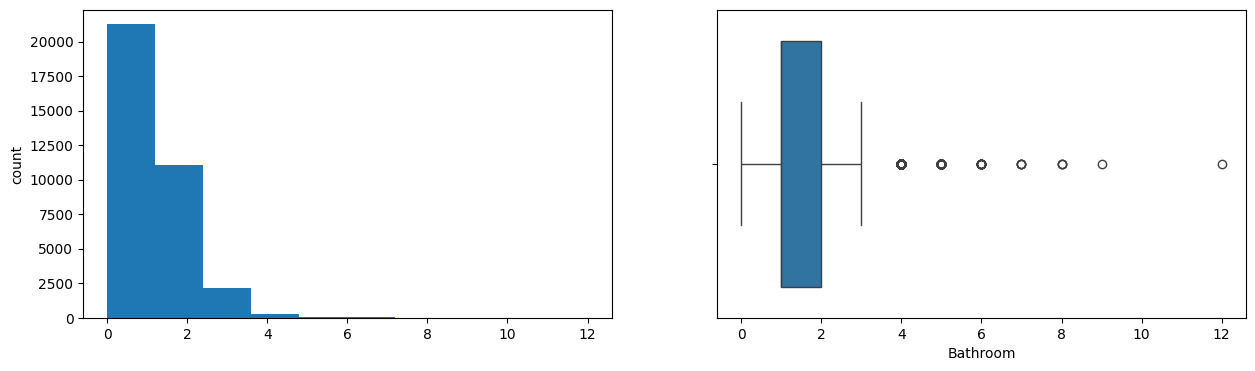

Column:  Car
Skew : 1.4


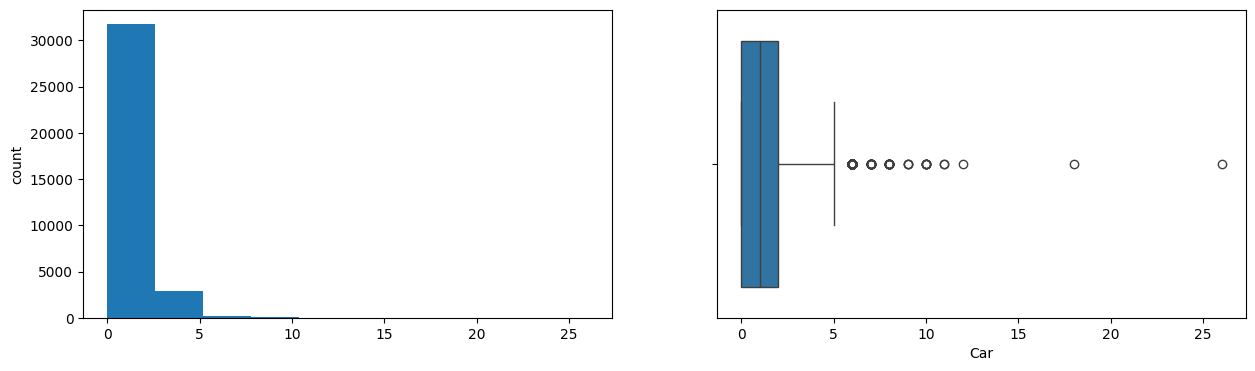

Column:  Landsize
Skew : 116.49


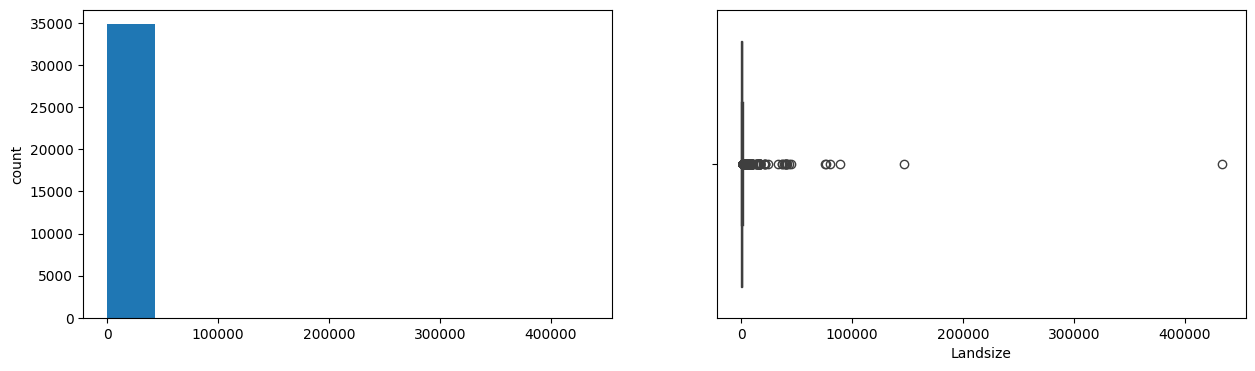

Column:  BuildingArea
Skew : 138.49


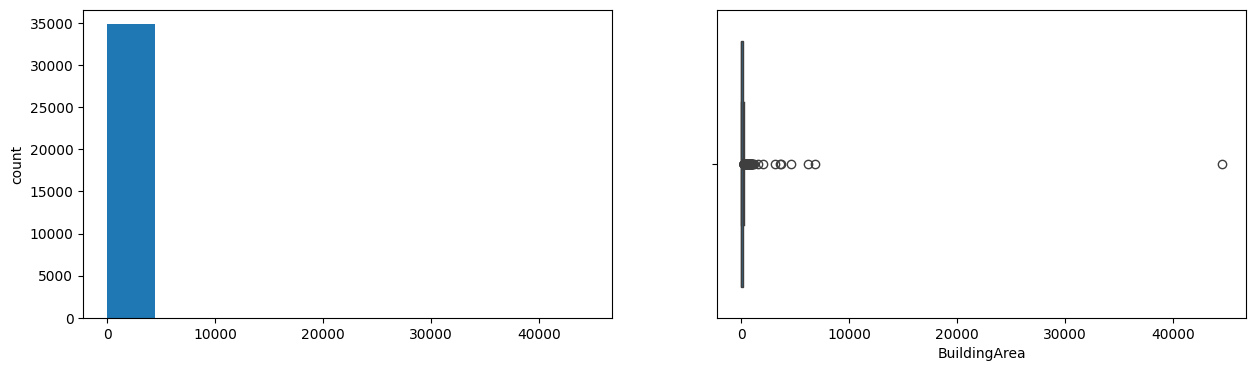

Column:  YearBuilt
Skew : 0.22


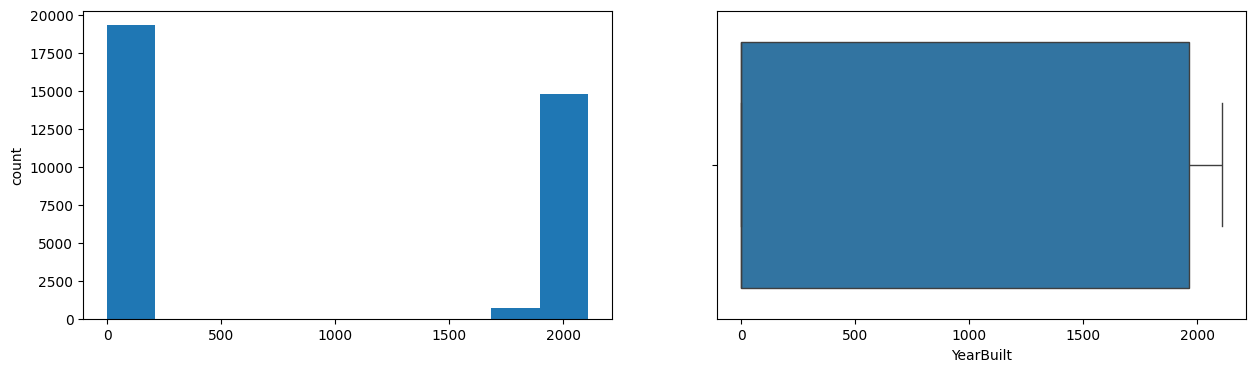

Column:  Lattitude
Skew : 1.29


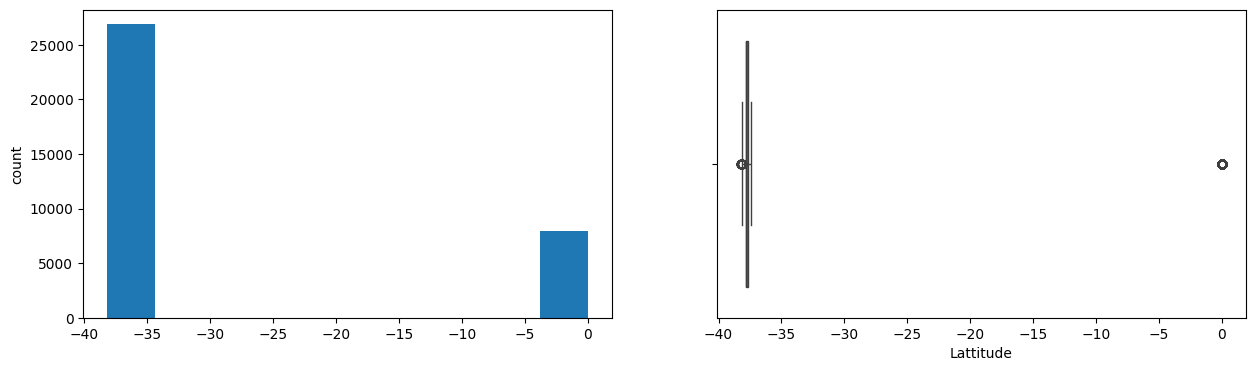

Column:  Longtitude
Skew : -1.29


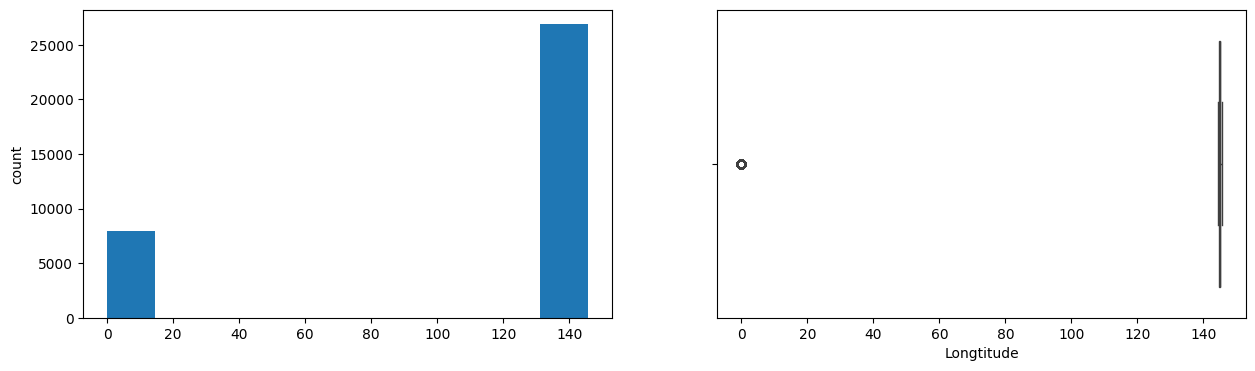

Column:  Propertycount
Skew : 0.99


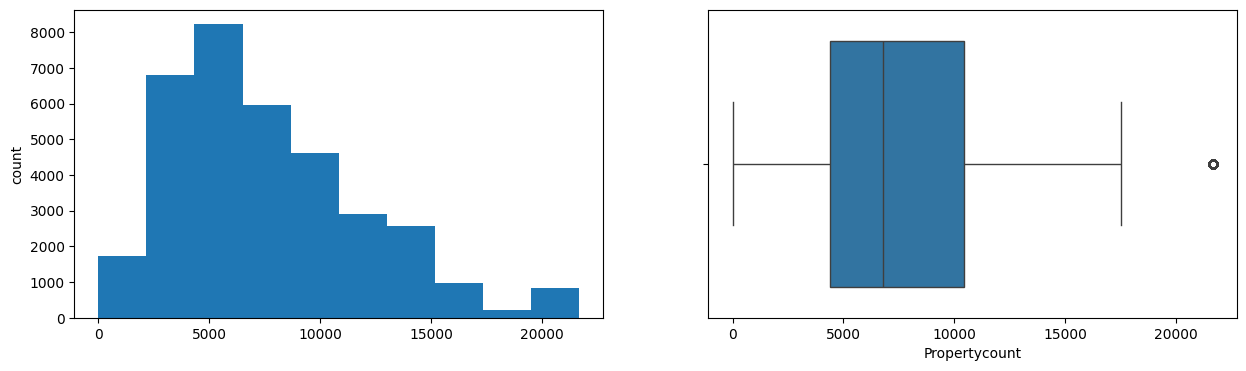

Column:  zHouse_Age
Skew : -0.22


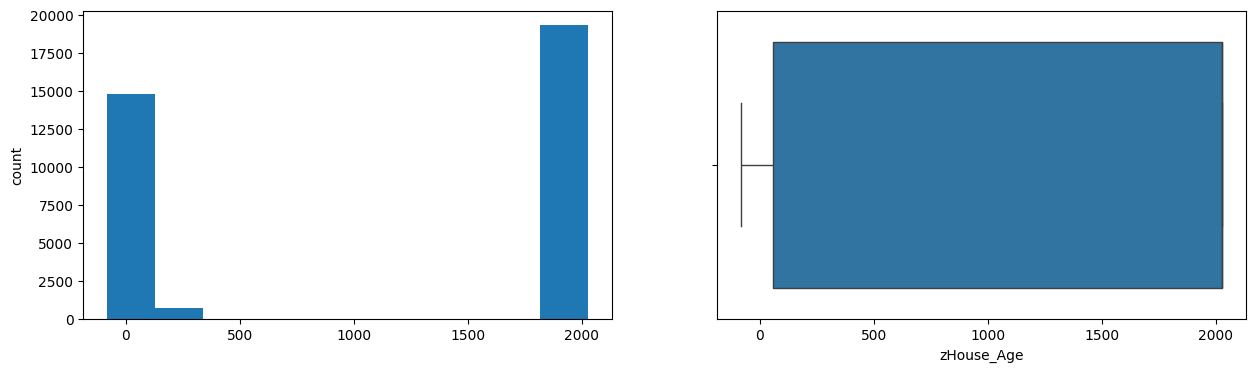

Column:  zDate_Year
Skew : 0.48


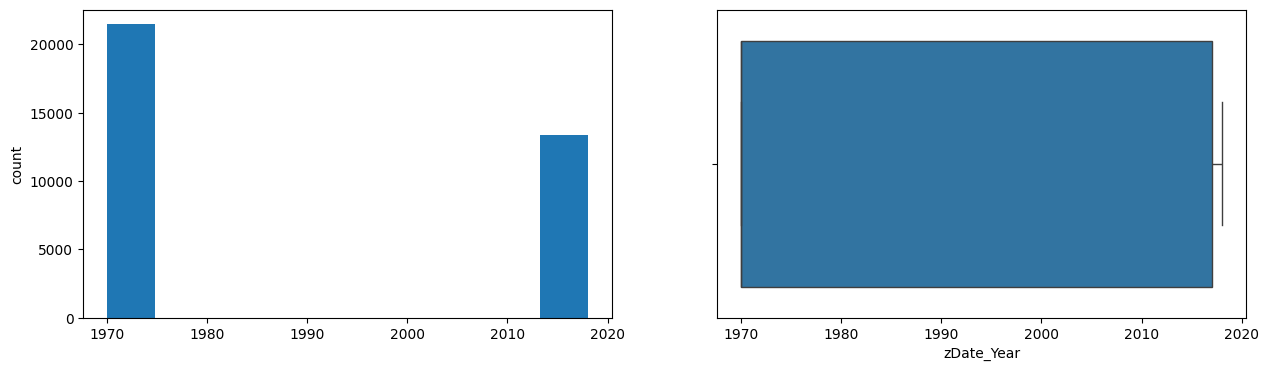

Column:  zDate_Month
Skew : 1.26


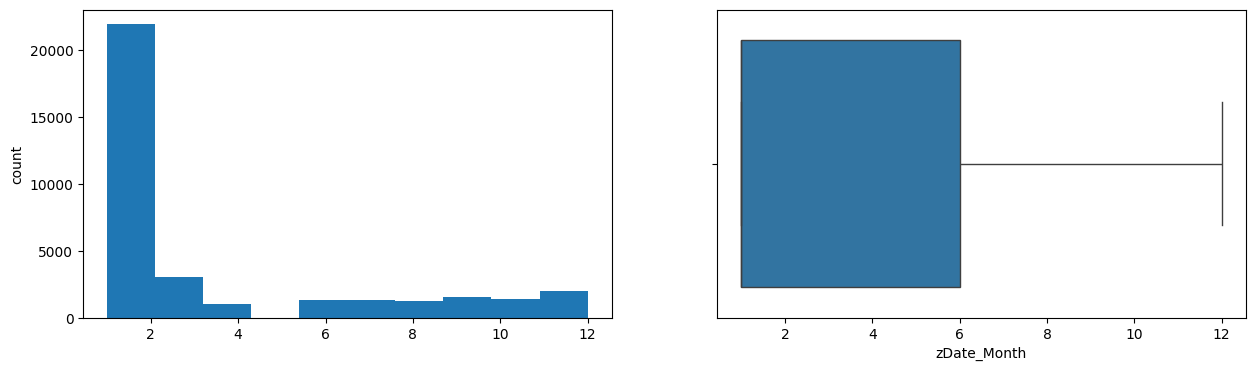

Column:  zDate_DoW
Skew : -0.36


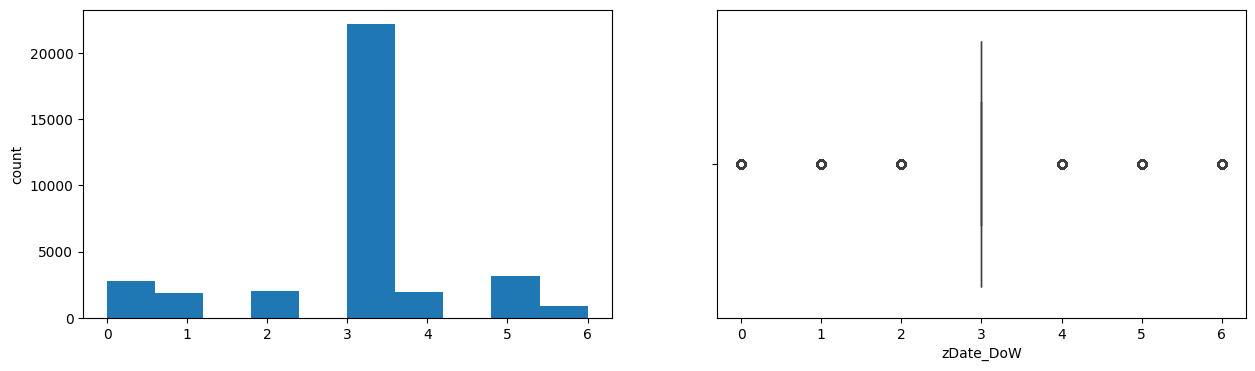

Column:  zPrice_perRoom
Skew : 1.23


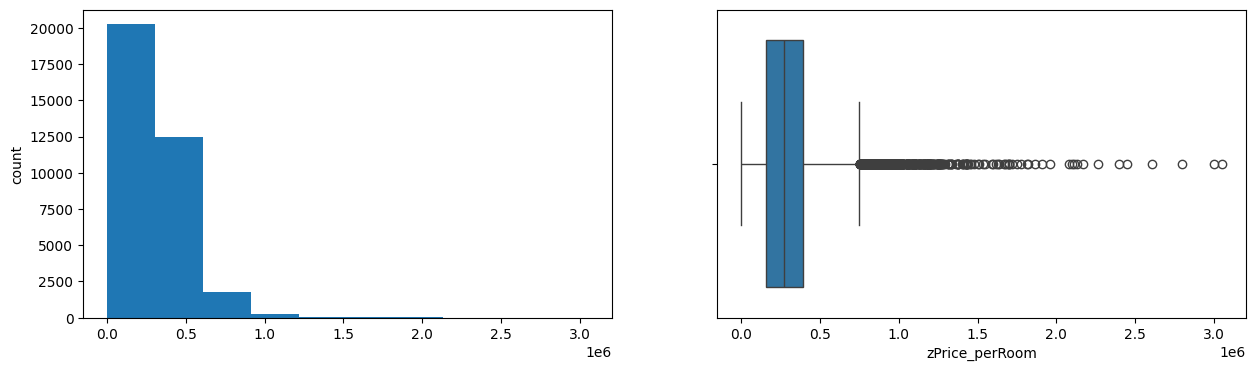

In [55]:
for col in num_cols:
    print("Column: ", col)
    print('Skew :', round(dataMBH[col].skew(), 2))
    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)
    dataMBH[col].hist(grid=False)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataMBH[col])

    plt.show()

+ categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing price

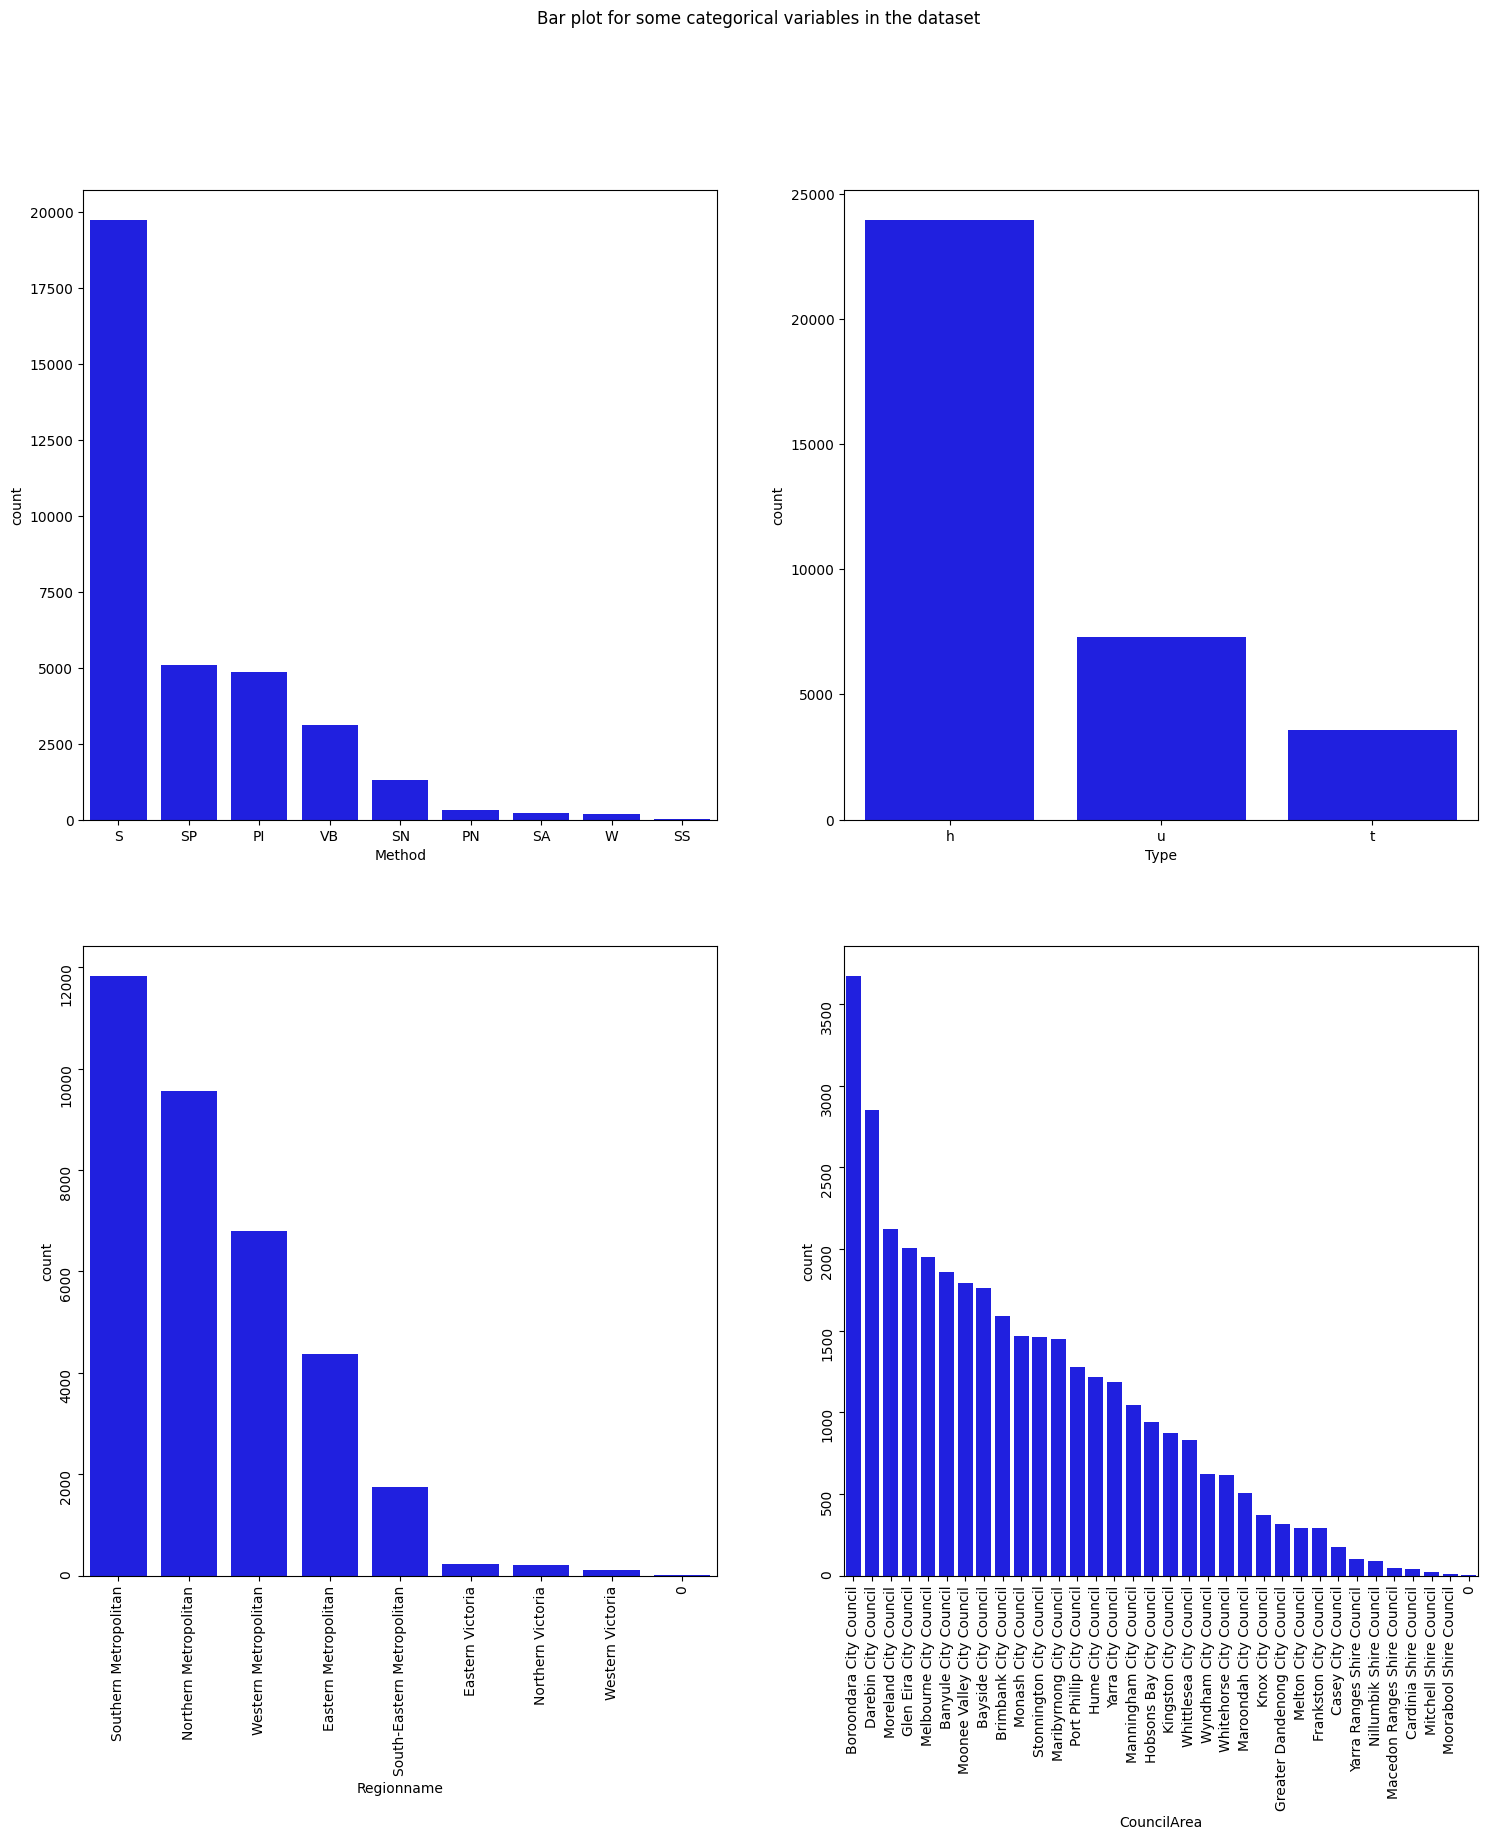

In [56]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for some categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Method', data = dataMBH, color = 'blue',
              order = dataMBH['Method'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Type', data = dataMBH, color = 'blue',
              order = dataMBH['Type'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Regionname', data = dataMBH, color = 'blue',
              order = dataMBH['Regionname'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'CouncilArea', data = dataMBH, color = 'blue',
              order = dataMBH['CouncilArea'].value_counts().index);

axes[1][0].tick_params(labelrotation=90);
axes[1][1].tick_params(labelrotation=90);

### ...more visual Data Analysis  

[]

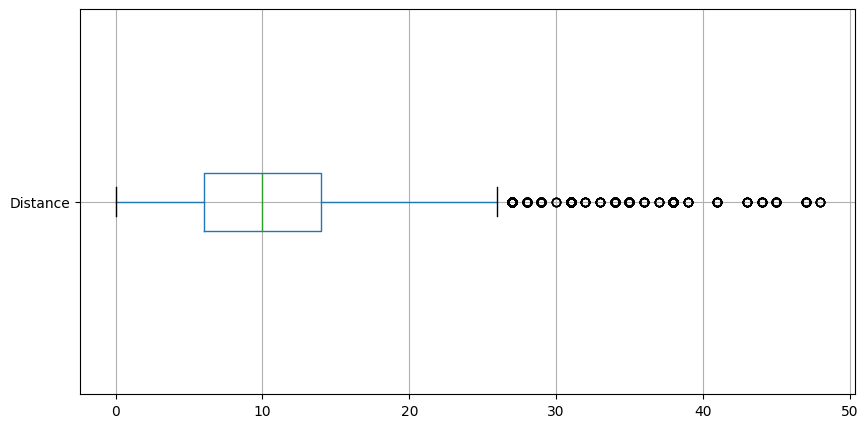

In [57]:
plt.figure(figsize=(10,5))
# Boxplot single column
bx_plot = dataMBH.boxplot(column = "Distance", vert = False)
bx_plot.plot()

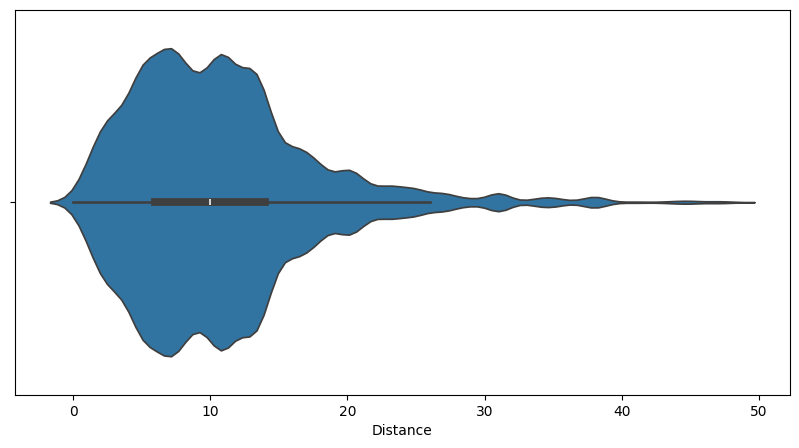

In [58]:
plt.figure(figsize=(10,5))
sns.violinplot(x=dataMBH["Distance"])
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

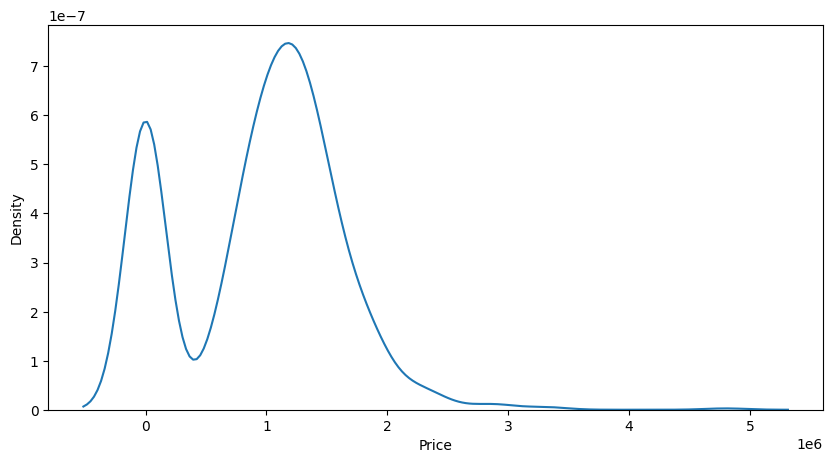

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(dataMBH[(dataMBH['Regionname']=='Southern Metropolitan')
                       &(dataMBH['Type']=='h')
                       &(dataMBH['Rooms']==2)]
                       ["Price"])

<Axes: xlabel='Price', ylabel='Density'>

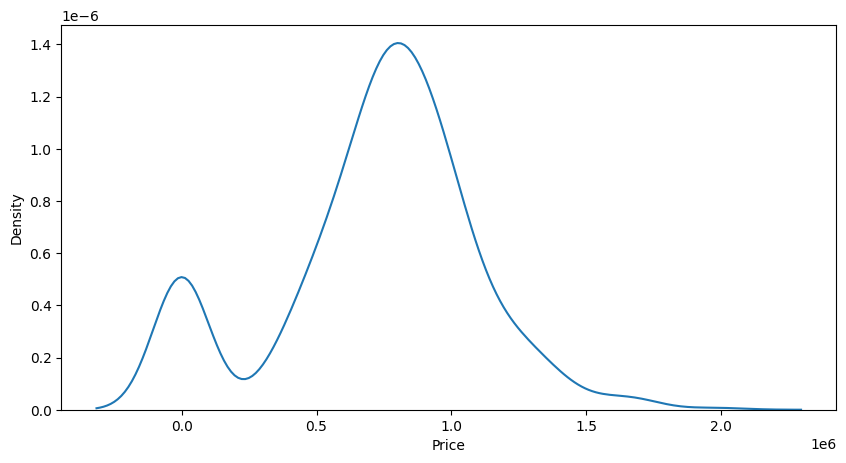

In [61]:
plt.figure(figsize=(10,5))
sns.kdeplot(dataMBH[(dataMBH['Regionname']=='Western Metropolitan')
                       &(dataMBH['Type']=='h')
                       &(dataMBH['Rooms']==2)]["Price"])

[]

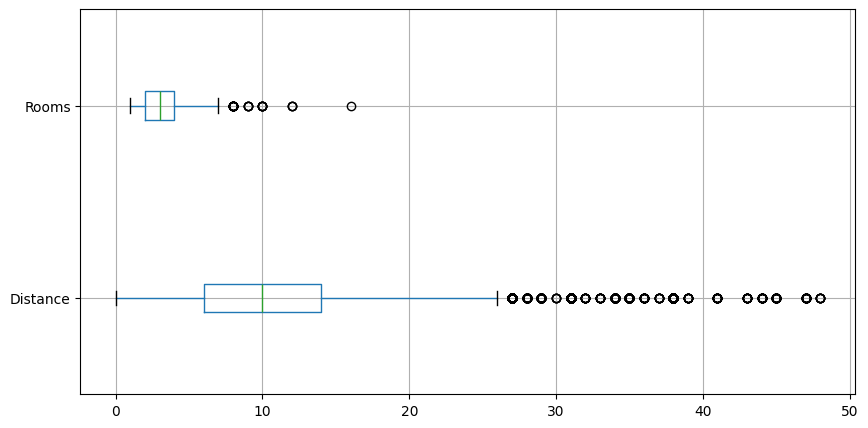

In [62]:
plt.figure(figsize=(10,5))
# Boxplot multiple columns
bx_plot = dataMBH.boxplot(column = ['Distance', 'Rooms'], vert = False)
bx_plot.plot()

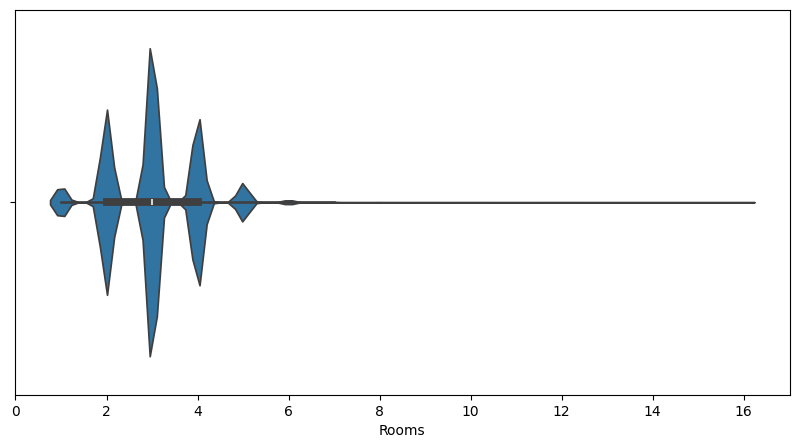

In [63]:
plt.figure(figsize=(10,5))
sns.violinplot(x=dataMBH["Rooms"])
plt.show()

## Bivariate Analysis  

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

+ For *Numerical* variables, **pair plots** and **scatter plots** are widely been used to do Bivariate Analysis.

<Figure size 1500x1500 with 0 Axes>

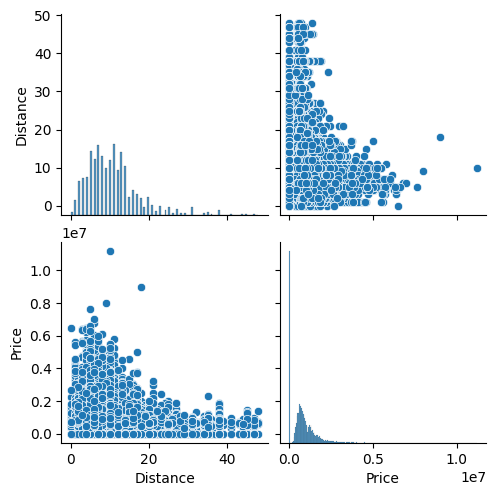

In [64]:
plt.figure(figsize=(15,15))
sns.pairplot(data=dataMBH[['Distance','Price']])
plt.show()

+ A **bar plot** can be used to show the relationship between Categorical variables and Continuous variables

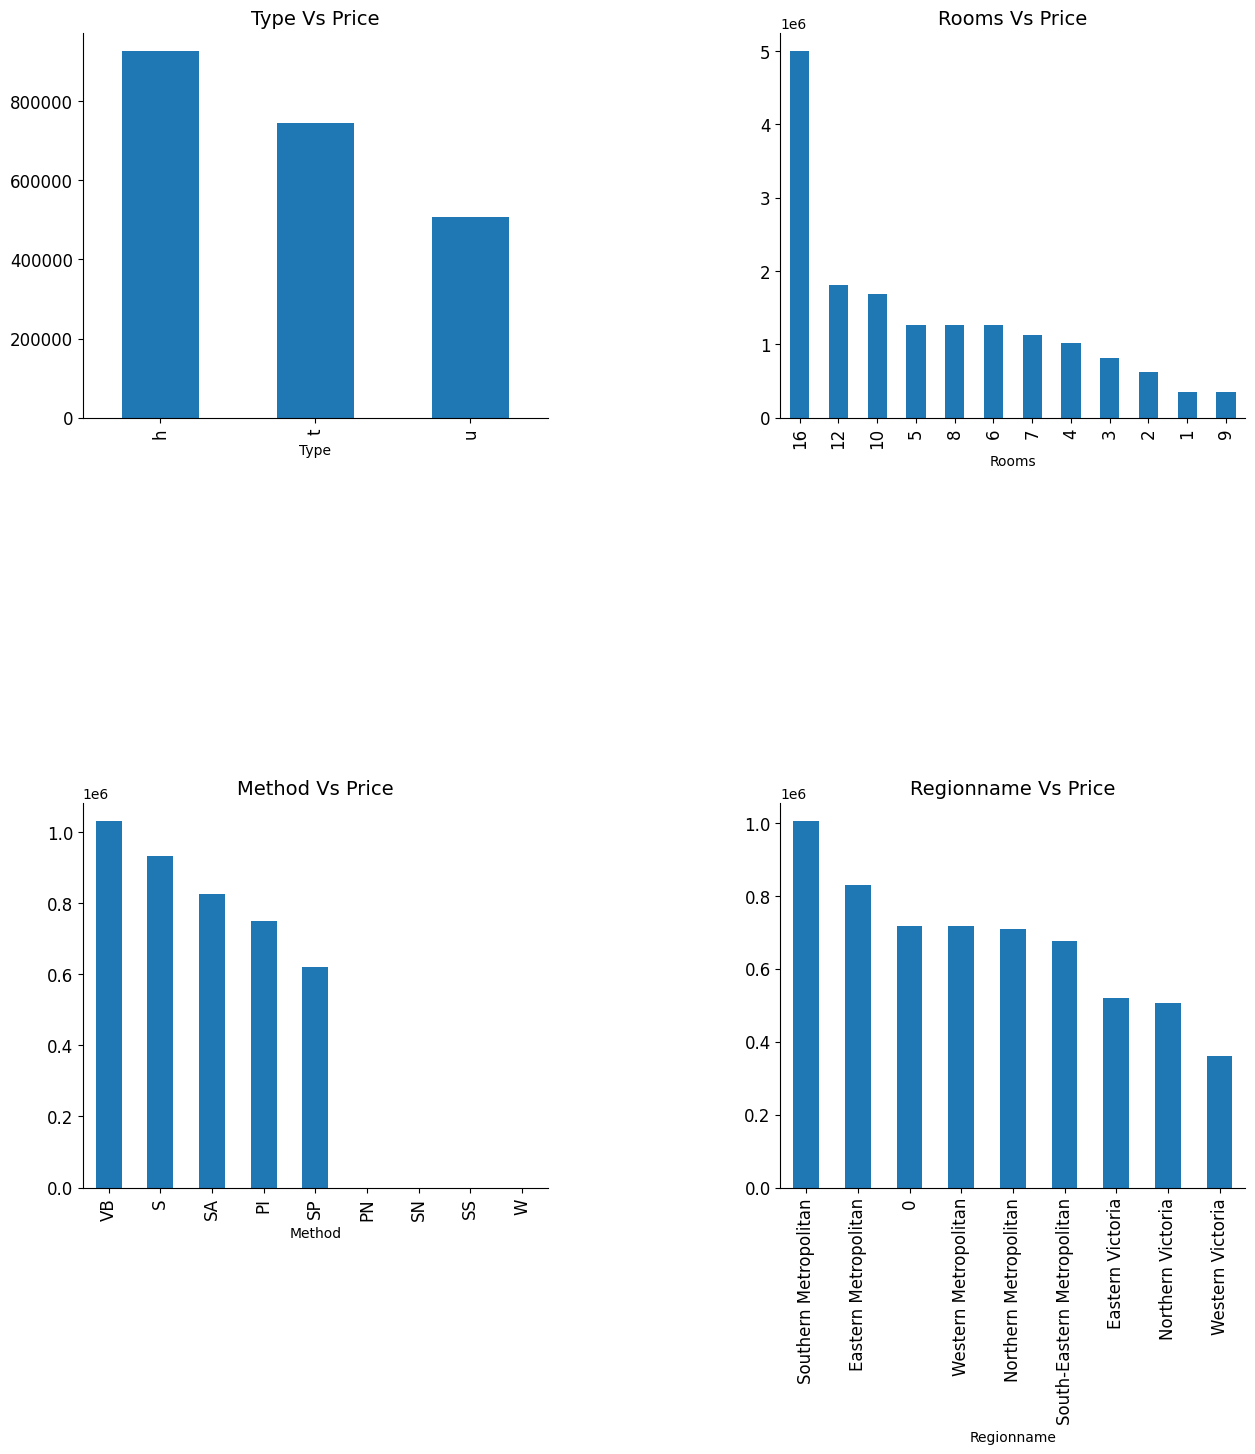

In [65]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))

dataMBH.groupby('Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Type Vs Price", fontsize=14)

dataMBH.groupby('Rooms')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Rooms Vs Price", fontsize=14)

dataMBH.groupby('Method')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Method Vs Price", fontsize=14)

dataMBH.groupby('Regionname')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Regionname Vs Price", fontsize=14)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

## Multivariate Analysis   

As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

+ A **pair plot** is widely been used for an initial rough correlation overview of all combination of variables in the dataset

> Note: This could be a very *computational intensive* calculation

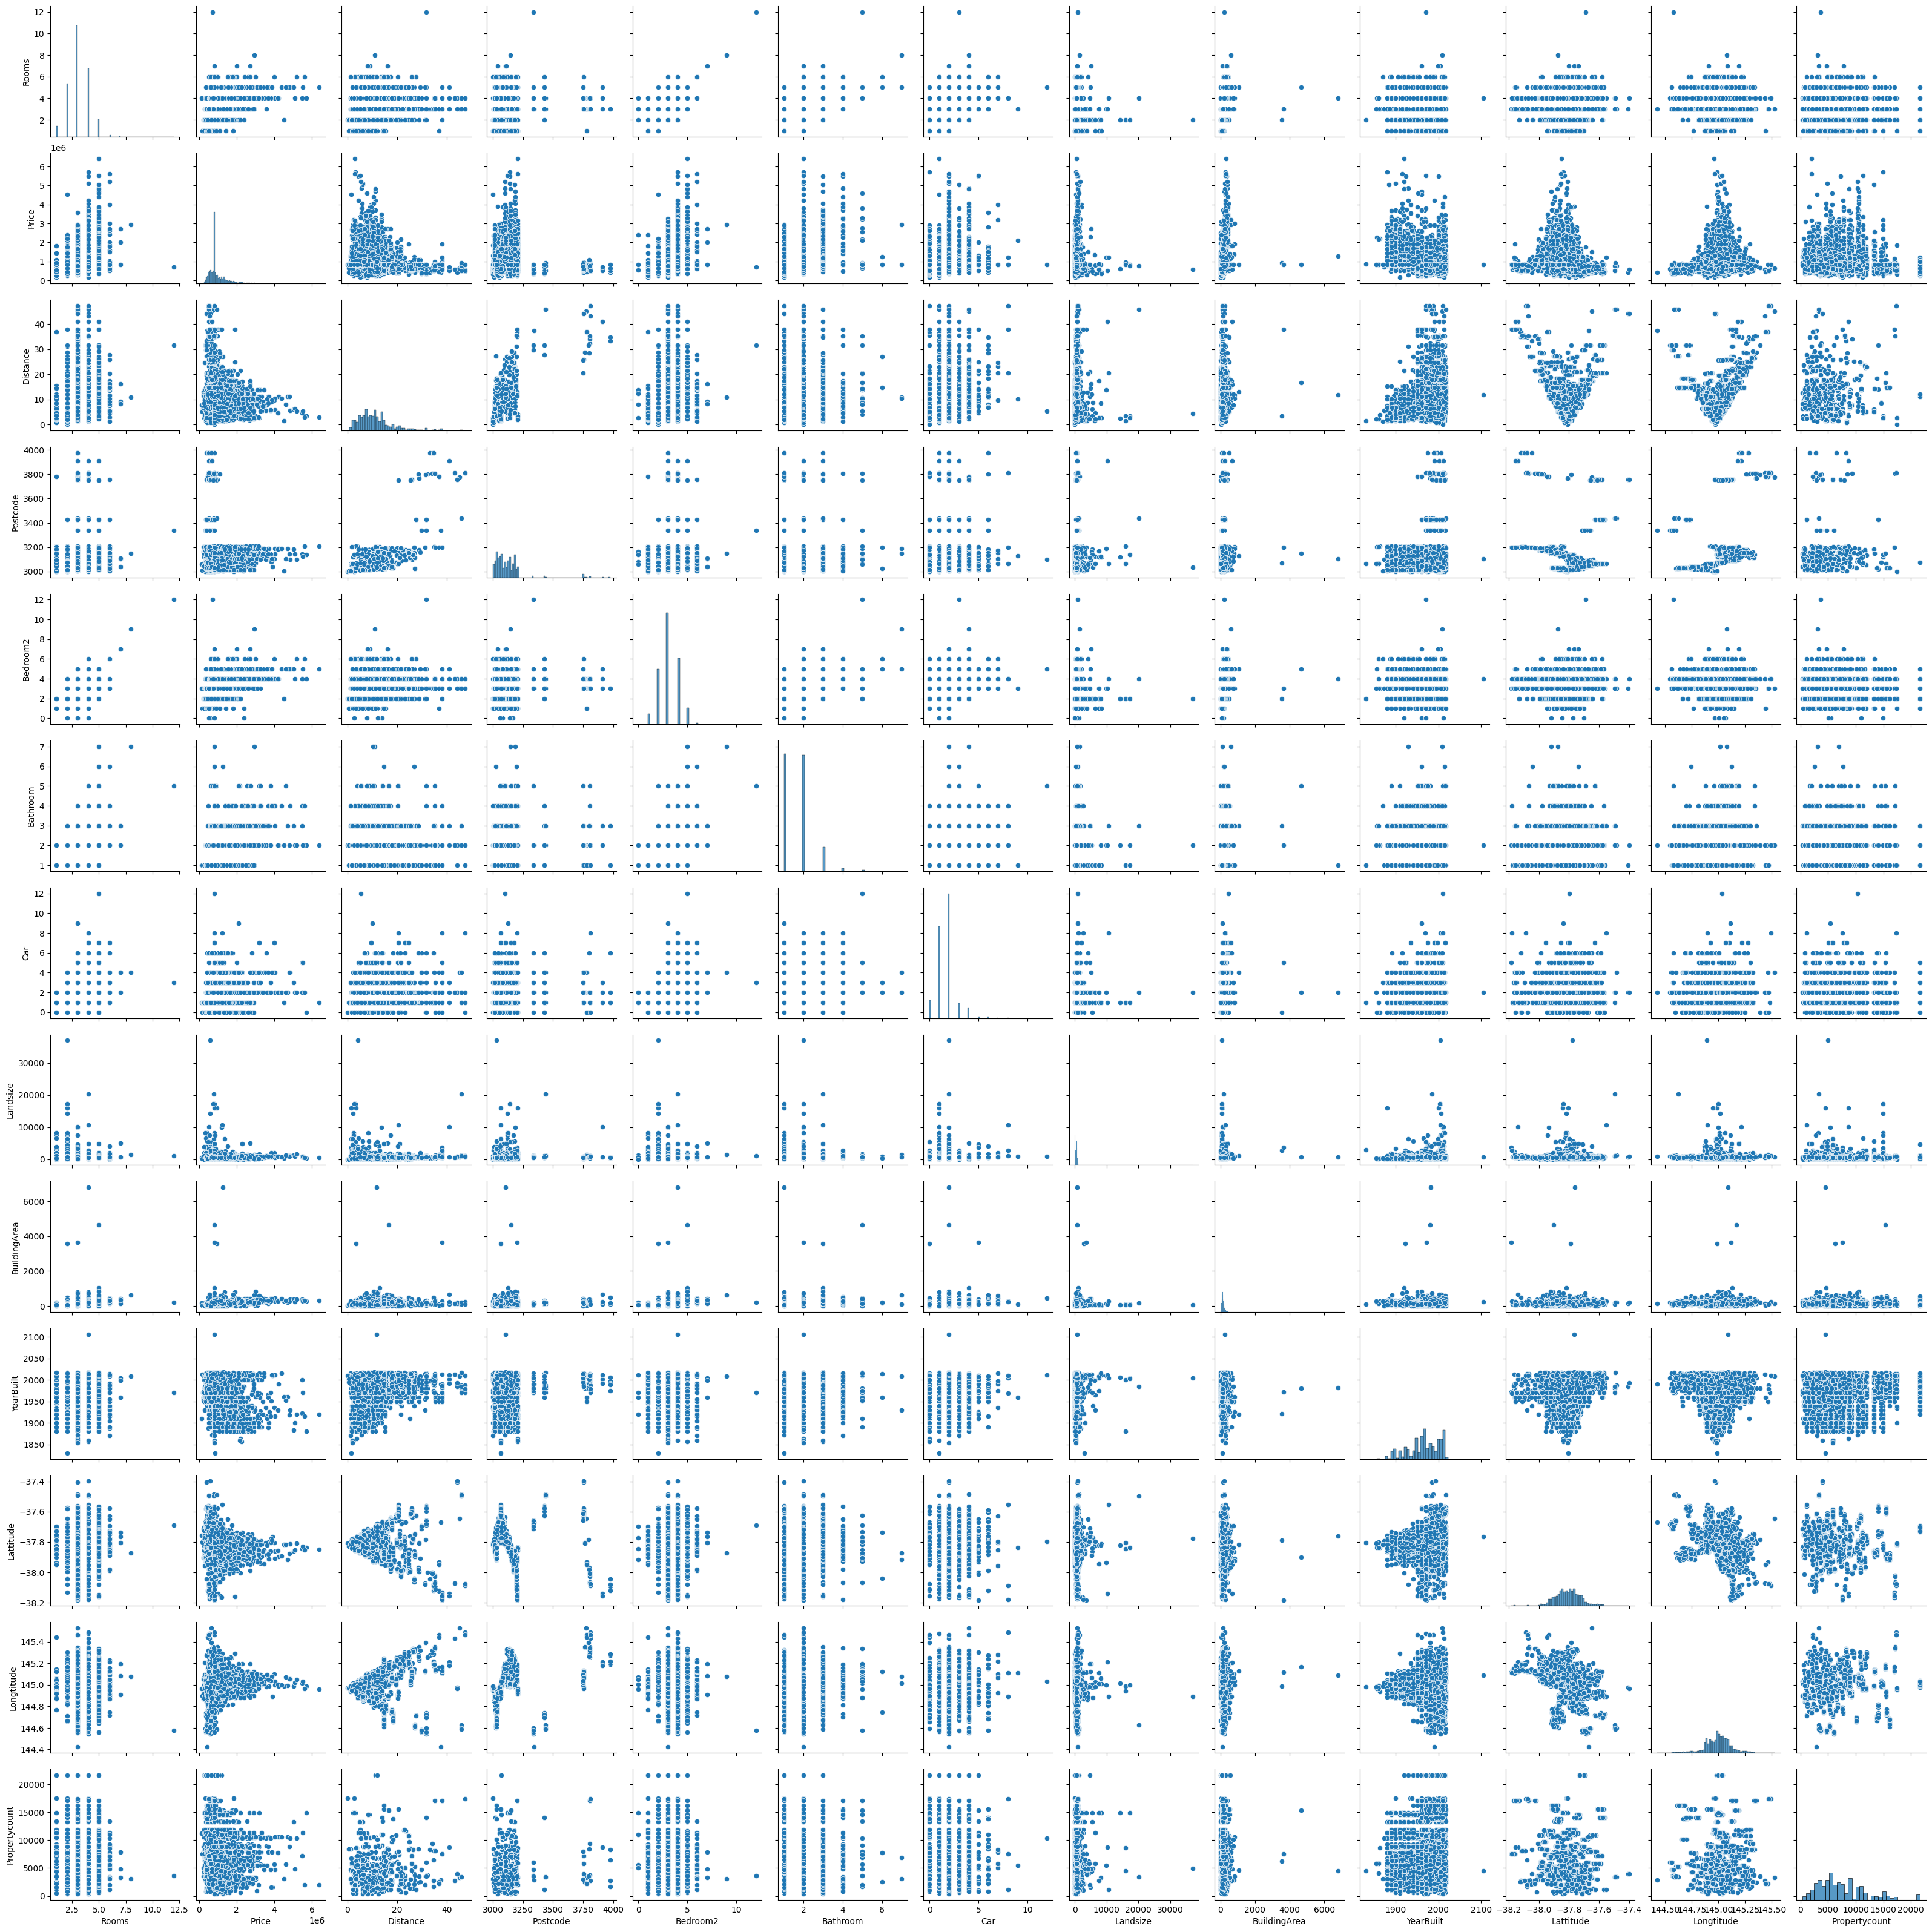

In [66]:
# Plotting the pairplot to understand the distribution and relationship between features
sns.pairplot(dataMBHraw.dropna())

+ A *heat map* is widely been used for Multivariate Analysis. Heat Map gives the correlation between the variables

> Note: First we have to generate a **matrix** data object with the corresponding variables and values

Our example heat map below shows the correlation between the variables "CouncilArea" and "Month" with corresponding "Price" values.

In [67]:
MBH_matrix  = dataMBH.pivot_table(index="CouncilArea", columns="zDate_Month", values="Price")

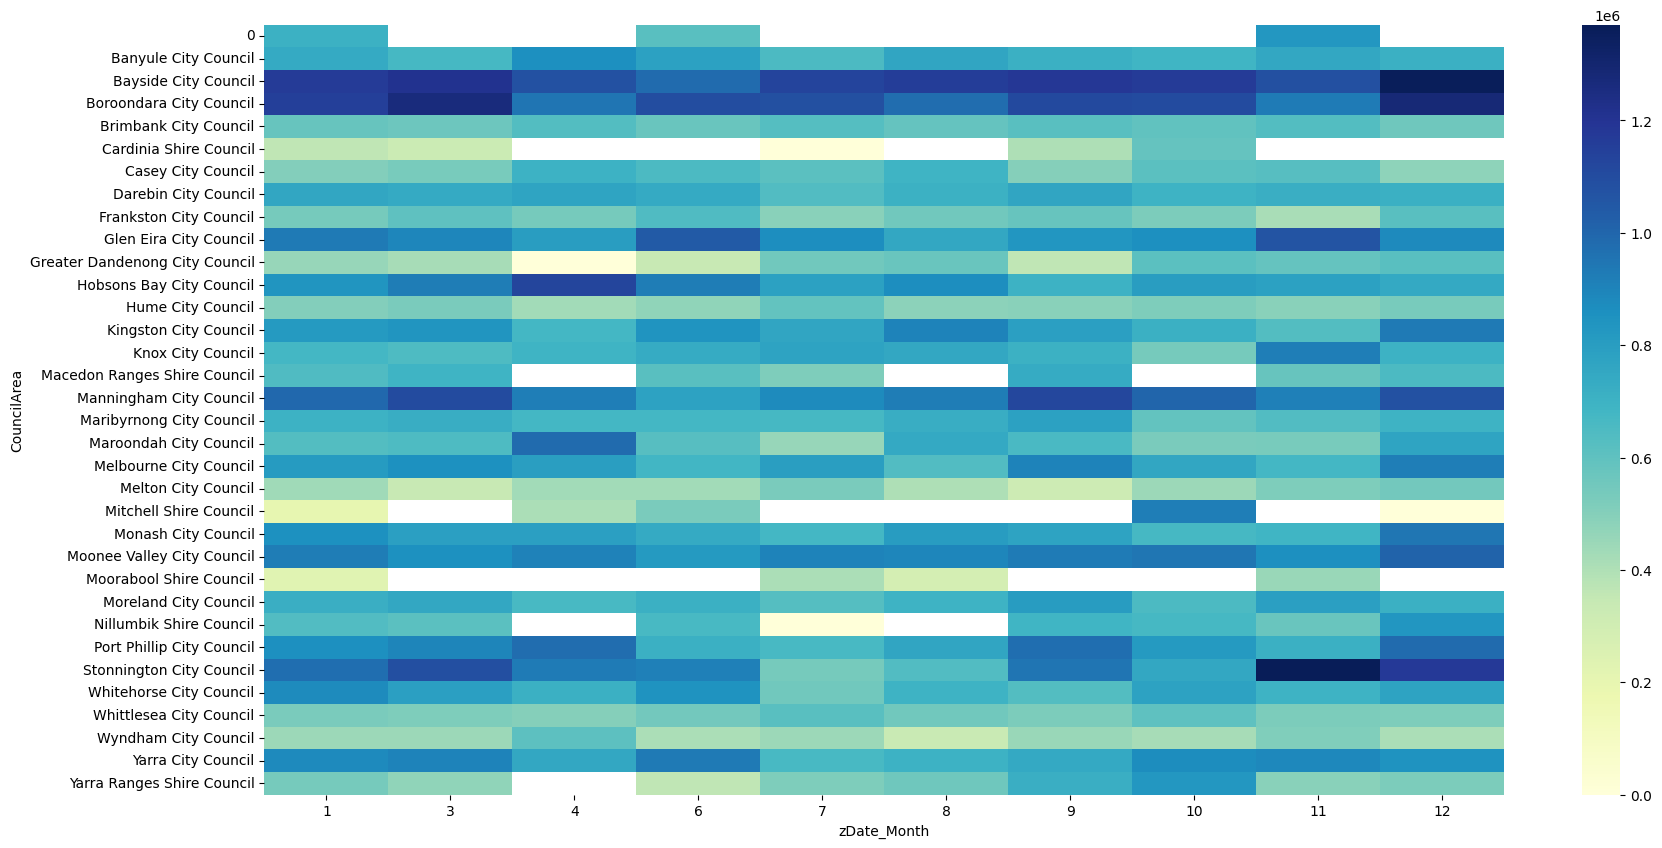

In [68]:
plt.figure(figsize=(20, 10))
sns.heatmap(MBH_matrix, cmap="YlGnBu", annot=False)
plt.show()

<Axes: >

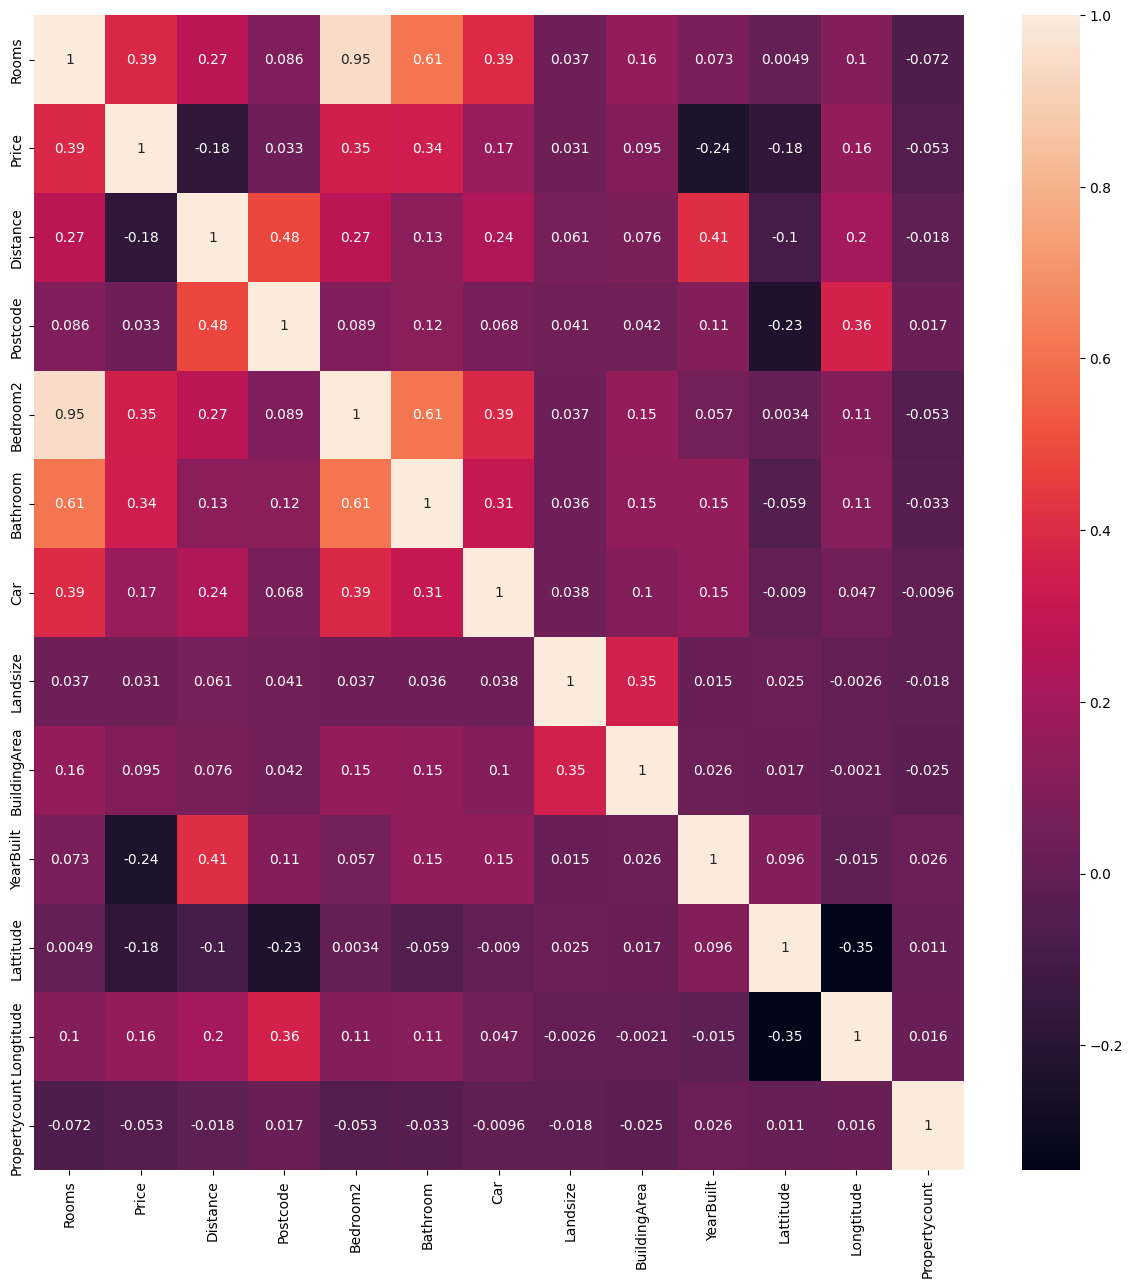

In [71]:
# Nur numerische Spalten extrahieren
numerical_data = dataMBHraw.select_dtypes(include='number')

# Heatmap plotten
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(numerical_data.corr(), annot=True, ax=ax)

<Axes: >

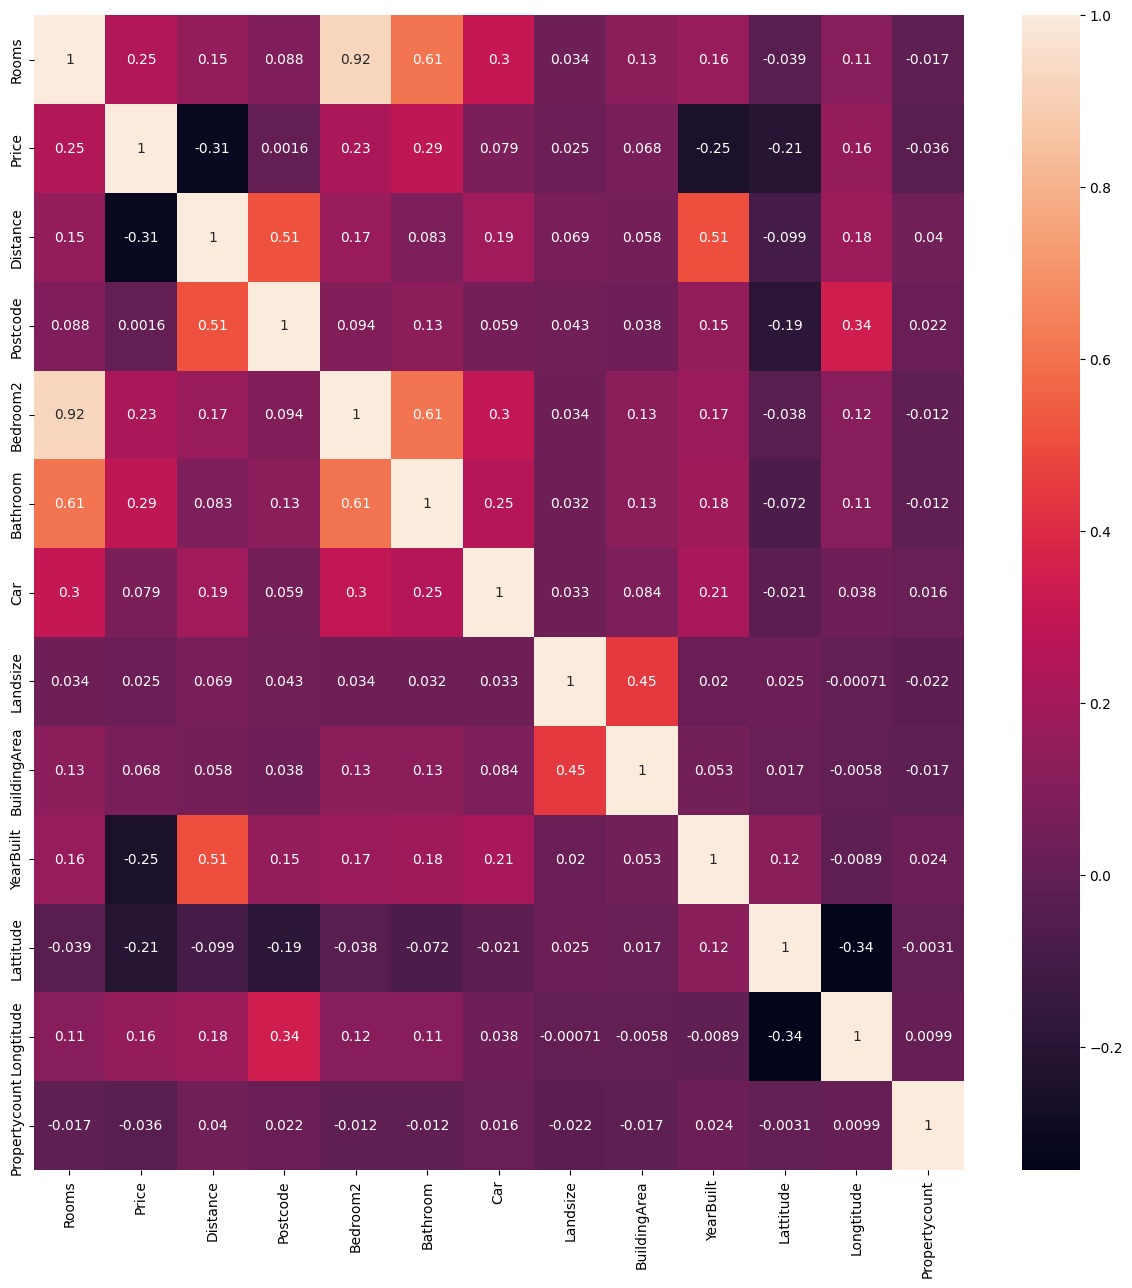

In [75]:
# Plotting the heatmap to understand the features correlation for houses sold of type h
# Nur numerische Spalten aus dem gefilterten DataFrame
numerical_data_h = dataMBHraw[dataMBHraw['Type']=='h'].select_dtypes(include='number')

# Heatmap plotten
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(numerical_data_h.corr(), annot=True, ax=ax)

# Step 7 - Data Transformation  

Before proceeding with Machine Learning algorithms, we analyze the data patterns, as some variables need to be transformed.

The Price variable is  highly skewed and on a larger scale. Let’s do **log transformation**.

A log transformation reduces the impact of extreme values and compresses the range of the data, making the distribution more symmetric and closer to a normal distribution, which is beneficial because many Machine Learning models assume normality for optimal performance and better interpretability.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables.



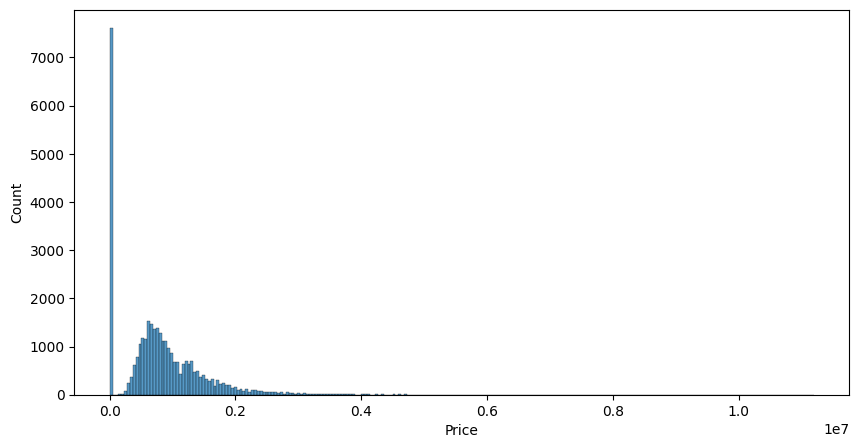

In [77]:
# let's take a look at the skewness of the Price variable
plt.figure(figsize=(10,5))
#histogram of the variable 'Price'
sns.histplot(dataMBH["Price"]);

In [78]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data['z'+ colname + '_log'] = np.log(data[colname]+1)
        else:
            data['z'+ colname + '_log'] = np.log(data[colname])
    data.info()

In [79]:
log_transform(dataMBH,['Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Suburb          34857 non-null  object        
 1   Address         34857 non-null  object        
 2   Rooms           34857 non-null  int64         
 3   Type            34857 non-null  object        
 4   Price           34857 non-null  float64       
 5   Method          34857 non-null  object        
 6   Date            34857 non-null  datetime64[ns]
 7   Distance        34857 non-null  int64         
 8   Postcode        34857 non-null  int64         
 9   Bathroom        34857 non-null  int64         
 10  Car             34857 non-null  int64         
 11  Landsize        34857 non-null  int64         
 12  BuildingArea    34857 non-null  int64         
 13  YearBuilt       34857 non-null  int64         
 14  CouncilArea     34857 non-null  object        
 15  La

C:\Users\Donat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


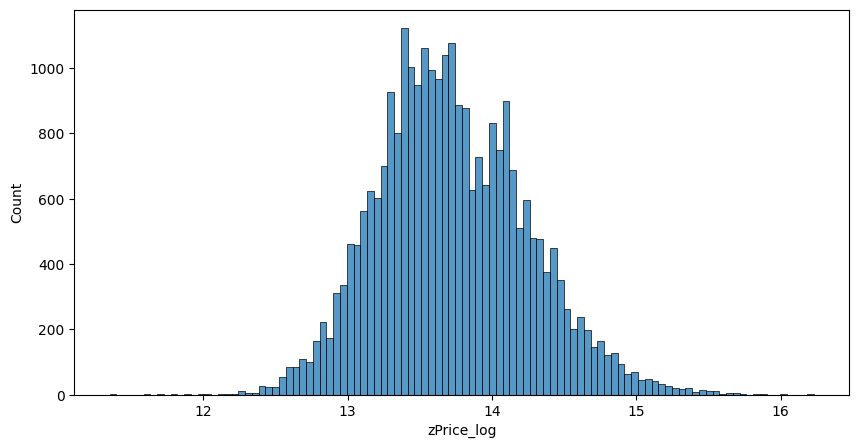

In [80]:
# and after the transformation
plt.figure(figsize=(10,5))
#Log transformed histogram of the variable 'Price'
sns.histplot(dataMBH["zPrice_log"]);